## SPRINT 9 - PROYECTO "Venta de entradas de eventos - Showz"

1. Introducción 

Te han ofrecido hacer prácticas en el departamento de analítica de Showz, una empresa de venta de entradas de eventos. Tu primera tarea es ayudar a optimizar los gastos de marketing. 

Contamos con:

- Registros del servidor con datos sobre las visitas a Showz desde enero de 2017 hasta diciembre de 2018;
- Un archivo con los pedidos en este periodo;
- Estadísticas de gastos de marketing.

Investigaremos:

- Cómo los clientes usan el servicio;
- Cuándo empiezan a comprar;
- Cuánto dinero aporta cada cliente a la compañía;
- Cuándo los ingresos cubren el costo de adquisición de los clientes.

2. Descripción de los datos

/datasets/visits_log_us.csv 

/datasets/orders_log_us.csv 

/datasets/costs_us.csv 

La tabla visits (registros del servidor con datos sobre las visitas al sitio web):

- Uid: identificador único del usuario.
- Device: dispositivo del usuario.
- Start Ts: fecha y hora de inicio de la sesión.
- End Ts: fecha y hora de término de la sesión.
- Source Id: identificador de la fuente de anuncios de la que proviene el usuario.
    
Todas las fechas de esta tabla están en formato AAAA-MM-DD.

La tabla orders (datos sobre pedidos):

- Uid: identificador único del usuario que realiza un pedido.
- Buy Ts: fecha y hora del pedido. Revenue: el ingreso de Showz por el pedido.

La tabla costs (datos sobre gastos de marketing):

- source_id: identificador de la fuente de anuncios.
- dt: fecha.
- costs: gastos en esta fuente de anuncios en este día.

3. INICIALIZACIÓN 

In [1]:
# Se cargan todas las librerias necesarias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats

In [2]:
# Se cargan los archivos de datos en diferentes DataFrames
visits_df =  pd.read_csv('/datasets/visits_log_us.csv', ',')
orders_df = pd.read_csv('/datasets/orders_log_us.csv', ',')
costs_df = pd.read_csv('/datasets/costs_us.csv', ',')

In [3]:
# Se imprime la información general/resumida del DataFrame de registros del servidor con los datos sobre las visitas al sitio web
visits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [4]:
# Se imprime una muestra de registros del servidor con los datos sobre las visitas al sitio web
visits_df.head(10)

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


In [5]:
# Se imprime la información general/resumida del DataFrame de los datos sobre pedidos 
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [6]:
# Se imprime una muestra de los datos sobre pedidos 
orders_df.head(10)

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


In [7]:
# Se imprime la información general/resumida del DataFrame de datos sobre gastos de marketing 
costs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [8]:
# Se imprime una muestra de los datos sobre gastos de marketing 
costs_df.head(10)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


3.1 PREPARACIÓN DE LOS DATOS 

In [9]:
# Confirmamos que los datos son correctos 
print(visits_df.dtypes)
print(orders_df.dtypes)
print(costs_df.dtypes)

Device       object
End Ts       object
Source Id     int64
Start Ts     object
Uid          uint64
dtype: object
Buy Ts      object
Revenue    float64
Uid         uint64
dtype: object
source_id      int64
dt            object
costs        float64
dtype: object


In [10]:
# Convertimos columnas de fechas a formato datetime

# Para visits_df
visits_df['Start Ts'] = pd.to_datetime(visits_df['Start Ts'])
visits_df['End Ts'] = pd.to_datetime(visits_df['End Ts'])

# Para orders_df
orders_df['Buy Ts'] = pd.to_datetime(orders_df['Buy Ts'])

# Para costs_df
costs_df['dt'] = pd.to_datetime(costs_df['dt'])

In [11]:
# Verificamos que la conversión de datos fue correcta
print(visits_df.dtypes)
print(orders_df.dtypes)
print(costs_df.dtypes)

Device               object
End Ts       datetime64[ns]
Source Id             int64
Start Ts     datetime64[ns]
Uid                  uint64
dtype: object
Buy Ts     datetime64[ns]
Revenue           float64
Uid                uint64
dtype: object
source_id             int64
dt           datetime64[ns]
costs               float64
dtype: object


In [12]:
# Confirmamos si hay datos nulos 
print(visits_df.isnull().sum())
print(orders_df.isnull().sum())
print(costs_df.isnull().sum())

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64
Buy Ts     0
Revenue    0
Uid        0
dtype: int64
source_id    0
dt           0
costs        0
dtype: int64


In [13]:
# Confirmamos si hay datos duplicados ya que pueden afectar conteos y agregaciones 
print(visits_df.duplicated().sum())
print(orders_df.duplicated().sum())
print(costs_df.duplicated().sum())

0
0
0


4. HAZ INFORMES Y CALCULA MÉTRICAS 

4.1 VISITAS 

¿Cuántas personas lo usan cada día, semana y mes?

In [14]:
# Extraemos la fecha
visits_df['date'] = visits_df['Start Ts'].dt.date

# Agrupamos por día
daily_users = visits_df.groupby('date')['Uid'].nunique()

print(daily_users.head(10)) 

date
2017-06-01    605
2017-06-02    608
2017-06-03    445
2017-06-04    476
2017-06-05    820
2017-06-06    797
2017-06-07    699
2017-06-08    868
2017-06-09    695
2017-06-10    350
Name: Uid, dtype: int64


In [15]:
# Extraemos el número de semana y año
visits_df['week'] = visits_df['Start Ts'].dt.to_period('W').apply(lambda r: r.start_time)

# Agrupamos por semana
weekly_users = visits_df.groupby('week')['Uid'].nunique()

print(weekly_users.head(10))

week
2017-05-29    2021
2017-06-05    4129
2017-06-12    2812
2017-06-19    2878
2017-06-26    3064
2017-07-03    3294
2017-07-10    4355
2017-07-17    3841
2017-07-24    2655
2017-07-31    2364
Name: Uid, dtype: int64


In [16]:
# Extraemos el mes (como periodo mensual)
visits_df['month'] = visits_df['Start Ts'].dt.to_period('M').astype(str)

# Agrupamos por mes
monthly_users = visits_df.groupby('month')['Uid'].nunique()

print(monthly_users.head(12))

month
2017-06    13259
2017-07    14183
2017-08    11631
2017-09    18975
2017-10    29692
2017-11    32797
2017-12    31557
2018-01    28716
2018-02    28749
2018-03    27473
2018-04    21008
2018-05    20701
Name: Uid, dtype: int64


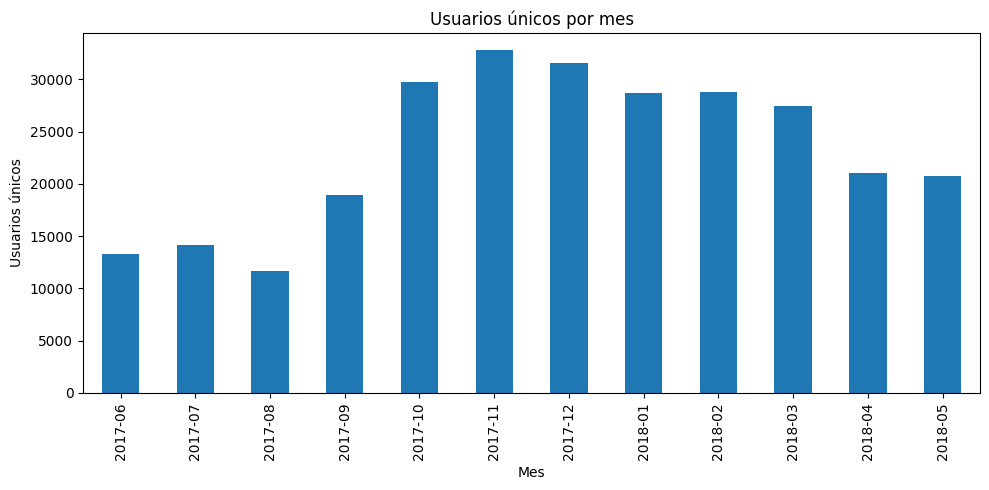

In [17]:
monthly_users.plot(kind='bar', figsize=(10, 5), title='Usuarios únicos por mes')
plt.xlabel('Mes')
plt.ylabel('Usuarios únicos')
plt.tight_layout()
plt.show()

In [18]:
# ¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión).
daily_sessions = visits_df.groupby('date').size()
daily_sessions.head(10)

date
2017-06-01    664
2017-06-02    658
2017-06-03    477
2017-06-04    510
2017-06-05    893
2017-06-06    875
2017-06-07    788
2017-06-08    939
2017-06-09    755
2017-06-10    375
dtype: int64

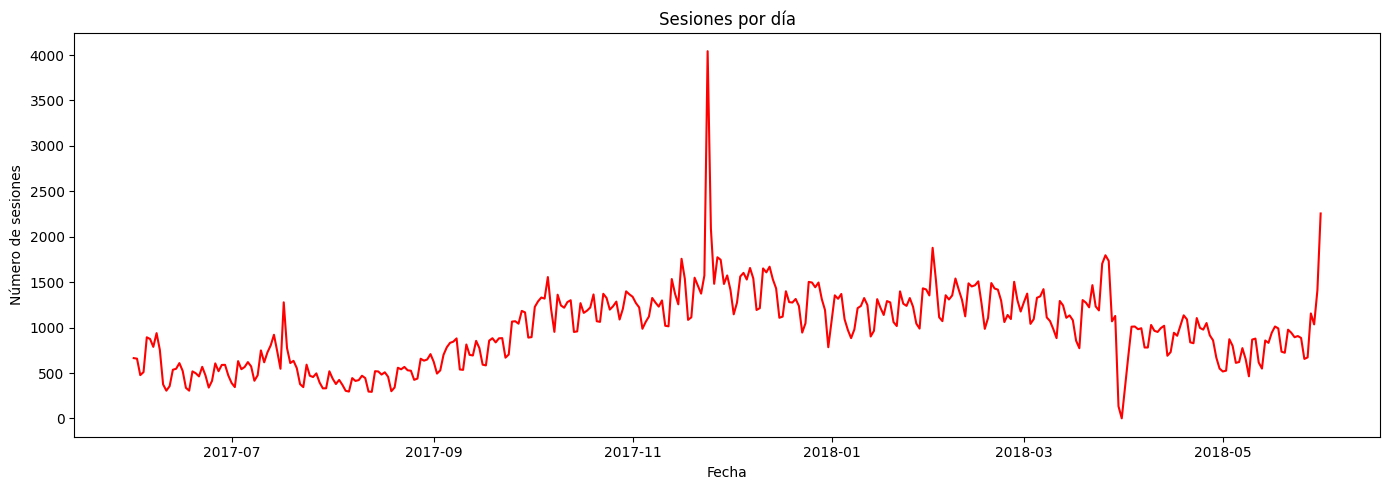

In [19]:
daily_sessions.plot(figsize=(14, 5), title='Sesiones por día', color='red')
plt.xlabel('Fecha')
plt.ylabel('Número de sesiones')
plt.tight_layout()
plt.show()

In [20]:
# ¿Cuál es la duración de cada sesión?
visits_df['session_duration_min'] = (visits_df['End Ts'] - visits_df['Start Ts']).dt.total_seconds() / 60
visits_df[['Uid', 'Start Ts', 'End Ts', 'session_duration_min']].head(10)

,Uid,Start Ts,End Ts,session_duration_min
0,16879256277535980062,2017-12-20 17:20:00,2017-12-20 17:38:00,18.0
1,104060357244891740,2018-02-19 16:53:00,2018-02-19 17:21:00,28.0
2,7459035603376831527,2017-07-01 01:54:00,2017-07-01 01:54:00,0.0
3,16174680259334210214,2018-05-20 10:59:00,2018-05-20 11:23:00,24.0
4,9969694820036681168,2017-12-27 14:06:00,2017-12-27 14:06:00,0.0
5,16007536194108375387,2017-09-03 21:35:00,2017-09-03 21:36:00,1.0
6,6661610529277171451,2018-01-30 11:13:00,2018-01-30 12:09:00,56.0
7,11423865690854540312,2017-11-05 15:14:00,2017-11-05 15:15:00,1.0
8,2987360259350925644,2017-07-19 10:41:00,2017-07-19 10:44:00,3.0
9,1289240080042562063,2017-11-08 13:42:00,2017-11-08 13:43:00,1.0


In [30]:
# ¿Con qué frecuencia los usuarios regresan?
# Calculamos la fecha de la visita anterior
visits_df['prev_session'] = visits_df.groupby('Uid')['Start Ts'].shift(1)

# Calculamos diferencia en días entre sesiones
visits_df['days_since_last_visit'] = (visits_df['Start Ts'] - visits_df['prev_session']).dt.days

visits_df[['Uid', 'Start Ts', 'prev_session', 'days_since_last_visit']].head(10)

,Uid,Start Ts,prev_session,days_since_last_visit
0,16879256277535980062,2017-12-20 17:20:00,NaT,NaN
1,104060357244891740,2018-02-19 16:53:00,NaT,NaN
2,7459035603376831527,2017-07-01 01:54:00,NaT,NaN
3,16174680259334210214,2018-05-20 10:59:00,NaT,NaN
4,9969694820036681168,2017-12-27 14:06:00,NaT,NaN
5,16007536194108375387,2017-09-03 21:35:00,NaT,NaN
6,6661610529277171451,2018-01-30 11:13:00,NaT,NaN
7,11423865690854540312,2017-11-05 15:14:00,NaT,NaN
8,2987360259350925644,2017-07-19 10:41:00,NaT,NaN
9,1289240080042562063,2017-11-08 13:42:00,NaT,NaN


4.2 VENTAS

In [31]:
# ¿Cuándo empieza la gente a comprar? 

# Obtenemos la primera visita de cada usuario 
first_visits = visits_df.groupby('Uid')['Start Ts'].min().reset_index()
first_visits.columns = ['Uid', 'first_visit']

# Obtenemos la primera compra de cada usuario 
first_orders = orders_df.groupby('Uid')['Buy Ts'].min().reset_index()
first_orders.columns = ['Uid', 'first_order']

# Unimos ambas tablas y calculamos la diferencia 
user_journey = first_visits.merge(first_orders, on='Uid')
user_journey['days_to_first_purchase'] = (user_journey['first_order'] - user_journey['first_visit']).dt.days
user_journey.head(10)

,Uid,first_visit,first_order,days_to_first_purchase
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,106
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,0
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,0
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0
5,3077748354309989,2018-03-03 12:08:00,2018-03-03 12:33:00,0
6,3605148382144603,2017-08-15 21:54:00,2017-09-21 20:56:00,36
7,3753586865891862,2018-03-03 13:47:00,2018-03-03 13:50:00,0
8,4808417689019433,2018-01-09 23:10:00,2018-01-09 23:32:00,0
9,4992223027560440,2018-04-04 13:54:00,2018-04-04 13:54:00,0


In [32]:
# ¿Cuántos pedidos hacen durante un período de tiempo dado?
# Agruparemos los pedidos por mes
orders_df['order_month'] = orders_df['Buy Ts'].dt.to_period('M').astype(str)
orders_per_month = orders_df.groupby('order_month')['Uid'].count()
orders_per_month.head(10)

order_month
2017-06    2354
2017-07    2363
2017-08    1807
2017-09    3387
2017-10    5679
2017-11    5659
2017-12    6218
2018-01    4721
2018-02    5281
2018-03    5326
Name: Uid, dtype: int64

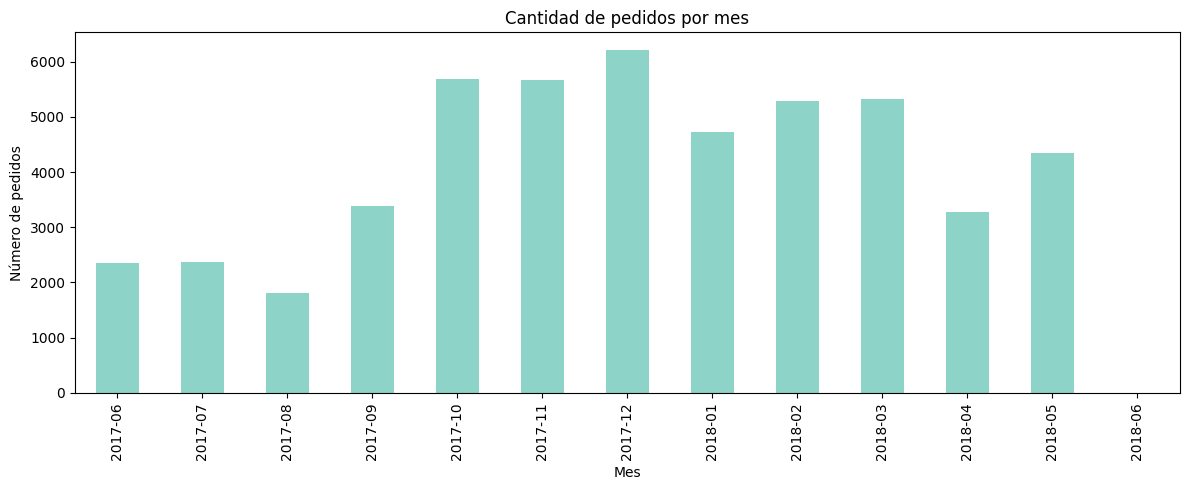

In [37]:
orders_per_month.plot(kind='bar', figsize=(12, 5), colormap='Set3')
plt.title('Cantidad de pedidos por mes')
plt.xlabel('Mes')
plt.ylabel('Número de pedidos')
plt.tight_layout()
plt.show()

In [38]:
# ¿Cuál es el tamaño promedio de compra?
average_order_value = orders_df['Revenue'].mean()
print(f"Tamaño promedio de compra: ${average_order_value:.2f}")

Tamaño promedio de compra: $5.00


In [42]:
# ¿Cuánto dinero traen? 
# Calculamos el LTV por usuario
ltv_per_user = orders_df.groupby('Uid')['Revenue'].sum().reset_index()
ltv_per_user.columns = ['Uid', 'LTV']

ltv_per_user.head(10)

,Uid,LTV
0,313578113262317,0.55
1,1575281904278712,3.05
2,2429014661409475,73.33
3,2464366381792757,2.44
4,2551852515556206,10.99
5,3077748354309989,4.67
6,3605148382144603,0.69
7,3753586865891862,3.50
8,4808417689019433,1.22
9,4992223027560440,3.05


In [45]:
# Obtenemos estadísticas del LTV
print(ltv_per_user['LTV'].describe())

count    36523.000000
mean         6.901328
std         88.128535
min          0.000000
25%          1.470000
50%          3.050000
75%          5.800000
max      11810.180000
Name: LTV, dtype: float64


4.3 MARKETING 

In [47]:
# ¿Cuánto dinero se gastó?  
total_cost = costs_df['costs'].sum()
print(f"Gasto total en marketing: ${total_cost:,.2f}")

Gasto total en marketing: $329,131.62


In [48]:
# ¿Cuánto se gastó por fuente de adquisición?
cost_by_source = costs_df.groupby('source_id')['costs'].sum().sort_values(ascending=False)
print(cost_by_source)

source_id
3     141321.63
4      61073.60
5      51757.10
2      42806.04
1      20833.27
10      5822.49
9       5517.49
Name: costs, dtype: float64


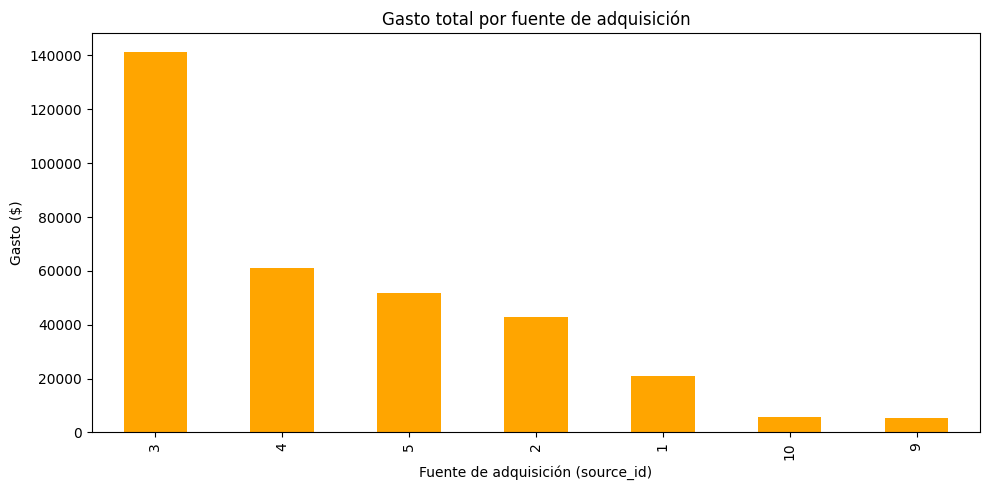

In [49]:
cost_by_source.plot(kind='bar', figsize=(10,5), color='orange')
plt.title('Gasto total por fuente de adquisición')
plt.xlabel('Fuente de adquisición (source_id)')
plt.ylabel('Gasto ($)')
plt.tight_layout()
plt.show()

In [56]:
# ¿Cómo evolucionó el gasto a lo largo del tiempo?
daily_costs = costs_df.groupby('dt')['costs'].sum()
print(daily_costs.head(20))

dt
2017-06-01     735.26
2017-06-02     721.19
2017-06-03     450.85
2017-06-04     761.16
2017-06-05     821.44
2017-06-06     711.99
2017-06-07     548.72
2017-06-08    1354.01
2017-06-09    1195.49
2017-06-10     391.14
2017-06-11     349.92
2017-06-12     383.65
2017-06-13     322.19
2017-06-14     431.12
2017-06-15     914.21
2017-06-16     555.48
2017-06-17     401.17
2017-06-18     454.67
2017-06-19     579.54
2017-06-20     559.13
Name: costs, dtype: float64


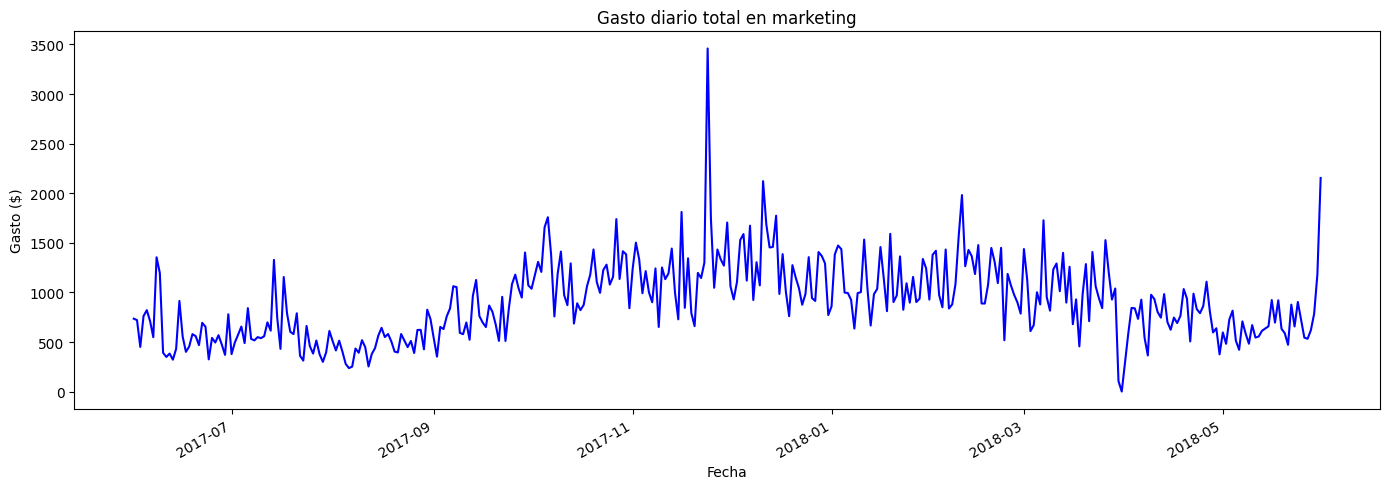

In [57]:
daily_costs.plot(figsize=(14, 5), color='blue')
plt.title('Gasto diario total en marketing')
plt.xlabel('Fecha')
plt.ylabel('Gasto ($)')
plt.tight_layout()
plt.show()

In [58]:
# ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?

# Usuarios únicos por fuente
unique_users_per_source = visits_df.groupby('Source Id')['Uid'].nunique()
unique_users_per_source.name = 'users'

# Gasto total por fuente
cost_per_source = costs_df.groupby('source_id')['costs'].sum()
cost_per_source.name = 'total_cost'

# Juntamos ambas series
cac_df = pd.concat([cost_per_source, unique_users_per_source], axis=1)

# Calculamos CAC
cac_df['CAC'] = cac_df['total_cost'] / cac_df['users']

cac_df = cac_df.sort_values('CAC')
print(cac_df)

    total_cost  users       CAC
9      5517.49   9264  0.595584
10     5822.49   8067  0.721766
4     61073.60  83525  0.731201
5     51757.10  56974  0.908434
1     20833.27  18999  1.096546
2     42806.04  26245  1.631017
3    141321.63  74756  1.890439
6          NaN      6       NaN
7          NaN     34       NaN


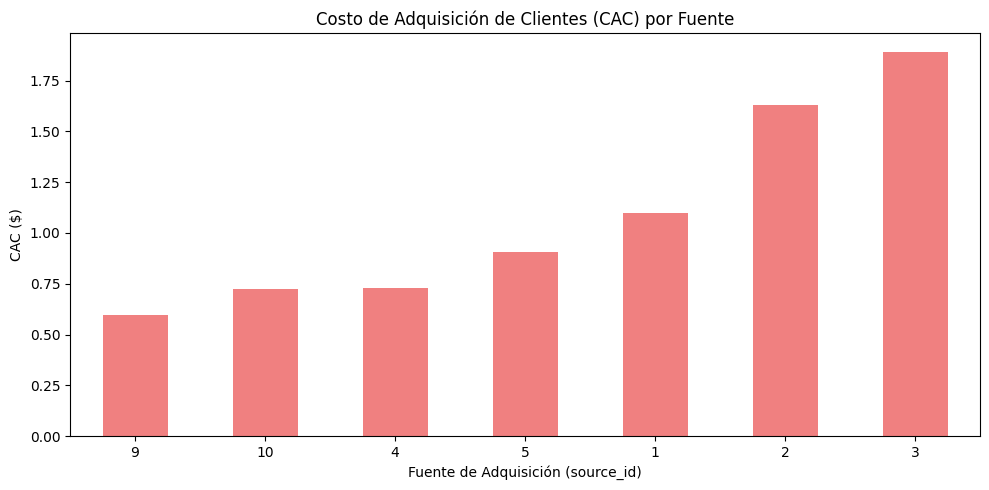

In [62]:
cac_df = cac_df.dropna(subset=['CAC'])
cac_df['CAC'].plot(kind='bar', figsize=(10,5), color='lightcoral')
plt.title('Costo de Adquisición de Clientes (CAC) por Fuente')
plt.xlabel('Fuente de Adquisición (source_id)')
plt.ylabel('CAC ($)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [63]:
# ¿Cuán rentables eran las inversiones? (ROMI)

# Ingresos por fuente (uniendo visitas y ventas)
revenue_per_source = visits_df.merge(orders_df, on='Uid', how='inner')
revenue_per_source = revenue_per_source.groupby('Source Id')['Revenue'].sum()
revenue_per_source.name = 'revenue'

# Costos por fuente
cost_per_source = costs_df.groupby('source_id')['costs'].sum()
cost_per_source.name = 'costs'

# Unimos ingresos y costos
romi_df = pd.concat([revenue_per_source, cost_per_source], axis=1)

# Calculamos ROMI
romi_df['ROMI'] = (romi_df['revenue'] - romi_df['costs']) / romi_df['costs']

# Ordenamos de mayor a menor rentabilidad
romi_df = romi_df.sort_values('ROMI', ascending=False)

print(romi_df)

         revenue      costs        ROMI
1   2.298200e+06   20833.27  109.313944
2   2.638189e+06   42806.04   60.631237
5   1.181477e+06   51757.10   21.827344
4   4.966902e+05   61073.60    7.132649
9   3.634225e+04    5517.49    5.586736
10  1.461923e+04    5822.49    1.510821
3   2.966880e+05  141321.63    1.099381
7   1.220000e+00        NaN         NaN


El "source_id" 1 explica que por cada peso gastado, la empresa ganó 109 pesos netos. Esta fuente es una máquina de generar ingresos.

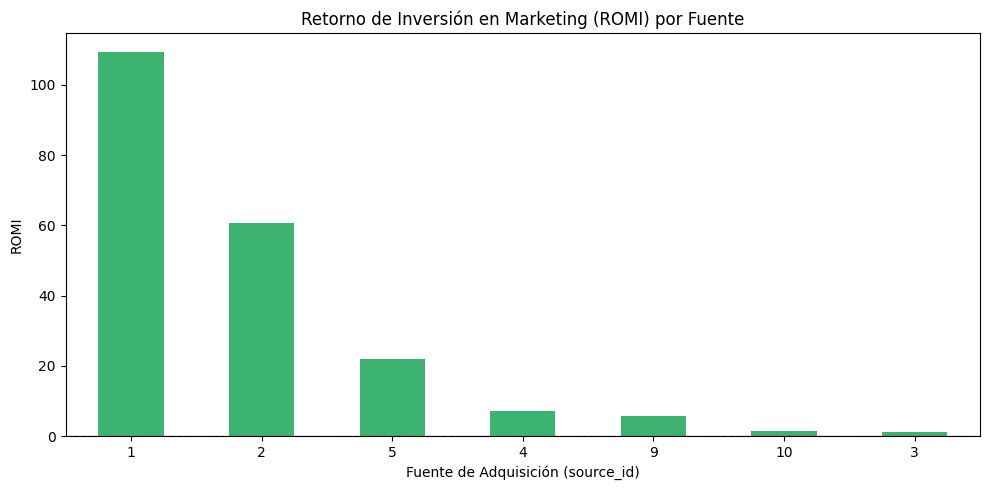

In [64]:
romi_df = romi_df.dropna(subset=['ROMI'])  
plt.figure(figsize=(10,5))
romi_df['ROMI'].plot(kind='bar', color='mediumseagreen')
plt.title('Retorno de Inversión en Marketing (ROMI) por Fuente')
plt.xlabel('Fuente de Adquisición (source_id)')
plt.ylabel('ROMI')
plt.xticks(rotation=0)
plt.axhline(0, color='gray', linestyle='--', linewidth=1) 
plt.tight_layout()
plt.show()

5. CONCLUSIONES 

Tras analizar los datos de ingresos, gastos y adquisición de clientes por fuente, se ha evaluado las métricas clave de ROMI (Retorno de Inversión en Marketing) y CAC (Costo de Adquisición de Clientes) para determinar la eficiencia y rentabilidad de cada canal de marketing.

Fuentes/plataformas recomendadas para invertir:
- Fuente 1 y Fuente 2 

ROMI extremadamente alto (109 y 60): estas plataformas generan ganancias netas muy superiores al costo invertido.

CAC competitivo: el costo para adquirir clientes es razonable dado el alto retorno.

Recomendación: aumentar o mantener inversión en estas fuentes para escalar ingresos de forma rentable.

- Fuentes 4, 5 y 9

ROMI positivo y significativo, aunque menor que las anteriores.

CAC moderado.

Mantener inversión con posibles ajustes 

Fuentes/plataformas para reducir inversión:
- Fuentes 3 y 10

ROMI cerca de 1 indica rentabilidad marginal, con CAC relativamente alto.

Aquí conviene analizar si podemos optimizar las campañas o reasignar presupuesto a canales más rentables.


Métricas clave en la selección:
ROMI: mide la rentabilidad neta de cada peso invertido. 

CAC: cuánto cuesta adquirir un cliente en cada canal.

También se consideró el volumen total de ingresos.

Conclusión final:

Invertir más en las fuentes con alto ROMI y CAC razonable es la mejor estrategia para optimizar el gasto de marketing. Estas fuentes no solo recuperan la inversión sino que generan grandes ganancias adicionales, garantizando crecimiento rentable. Las fuentes con ROMI bajo o datos faltantes deben revisarse para evitar gastos innecesarios y mejorar el rendimiento general.